In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#for model load libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# for visualisation
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/tennis.csv')
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [6]:
df.isnull().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

In [8]:
df.dtypes

outlook     object
temp        object
humidity    object
windy         bool
play        object
dtype: object

In [9]:
#encode columns
df_encoded = df
columns_to_encode = ['outlook', 'temp', 'humidity','windy']
le = LabelEncoder()
for column in columns_to_encode:
    df_encoded[column] = le.fit_transform(df_encoded[column])

In [10]:
df_encoded.head()

,outlook,temp,humidity,windy,play
0,2,1,0,0,no
1,2,1,0,1,no
2,0,1,0,0,yes
3,1,2,0,0,yes
4,1,0,1,0,yes


In [11]:
#create x and y variables

X = df_encoded.drop('play', axis=1)
y = df_encoded['play']

In [12]:
X

,outlook,temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [13]:
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: play, dtype: object

In [14]:
#train a decision tree
X_train, X_test, y_train, y_test = train_test_split(X,
                y, test_size=0.20, random_state=42)
data_unpruned =DecisionTreeClassifier(max_depth=None, random_state=42)
data_model = data_unpruned.fit(X_train, y_train)
print("Performance without pruning:", data_model.score(X_test, y_test)) #model is perfect with no pruning required
print("At depth:", data_model.tree_.max_depth)

Performance without pruning: 1.0
At depth: 4


In [15]:
#fit model
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

<function matplotlib.pyplot.show(close=None, block=None)>

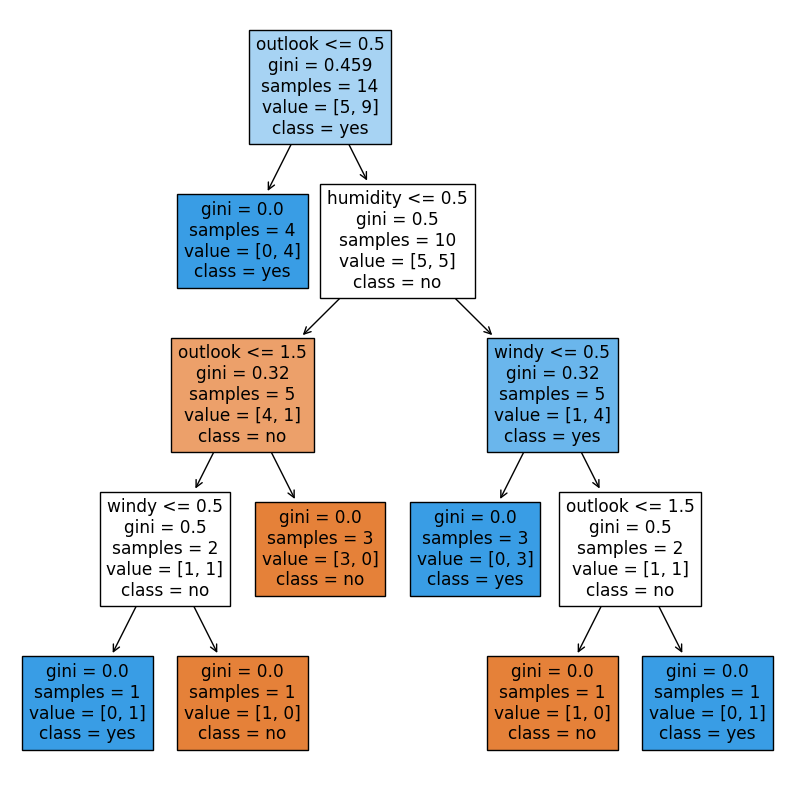

In [16]:
#plot decision tree
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=y.unique(), filled=True, ax=ax)

plt.show

In [17]:
#check accuracy
y_pred = data_unpruned.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"accuracy : {accuracy}")

accuracy : 100.0


In [18]:
#print confusion matrix
confusion_matrix(y_test, y_pred)

array([[1, 0],
       [0, 2]])